In [2]:
import pandas as pd

data = pd.read_csv("final_data.csv")
df = pd.DataFrame(data)

EDA KISMI

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0                         1000 non-null   int64 
 1   Unnamed: 0            1000 non-null   int64 
 2   Age                   1000 non-null   int64 
 3   Sex                   1000 non-null   object
 4   Job                   1000 non-null   int64 
 5   Housing               1000 non-null   object
 6   Saving accounts       1000 non-null   object
 7   Checking account      1000 non-null   object
 8   Credit amount         1000 non-null   int64 
 9   Duration              1000 non-null   int64 
 10  Purpose               1000 non-null   object
 11  Risk                  1000 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 93.9+ KB


In [4]:
df.head()

,,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,0,67,male,2,own,,little,1169,6,radio/TV,1
1,1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,2,2,49,male,1,own,little,,2096,12,education,1
3,3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,4,53,male,2,free,little,little,4870,24,car,0


In [5]:
df.describe()

,,Unnamed: 0,Age,Job,Credit amount,Duration,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,499.500000,35.546000,1.904000,3271.258000,20.903000,0.700000
std,288.819436,288.819436,11.375469,0.653614,2822.736876,12.058814,0.458487
min,0.000000,0.000000,19.000000,0.000000,250.000000,4.000000,0.000000
25%,249.750000,249.750000,27.000000,2.000000,1365.500000,12.000000,0.000000
50%,499.500000,499.500000,33.000000,2.000000,2319.500000,18.000000,1.000000
75%,749.250000,749.250000,42.000000,2.000000,3972.250000,24.000000,1.000000
max,999.000000,999.000000,75.000000,3.000000,18424.000000,72.000000,1.000000


In [6]:
df.isnull().sum()

                        0
Unnamed: 0              0
Age                     0
Sex                     0
Job                     0
Housing                 0
Saving accounts         0
Checking account        0
Credit amount           0
Duration                0
Purpose                 0
Risk                    0
dtype: int64

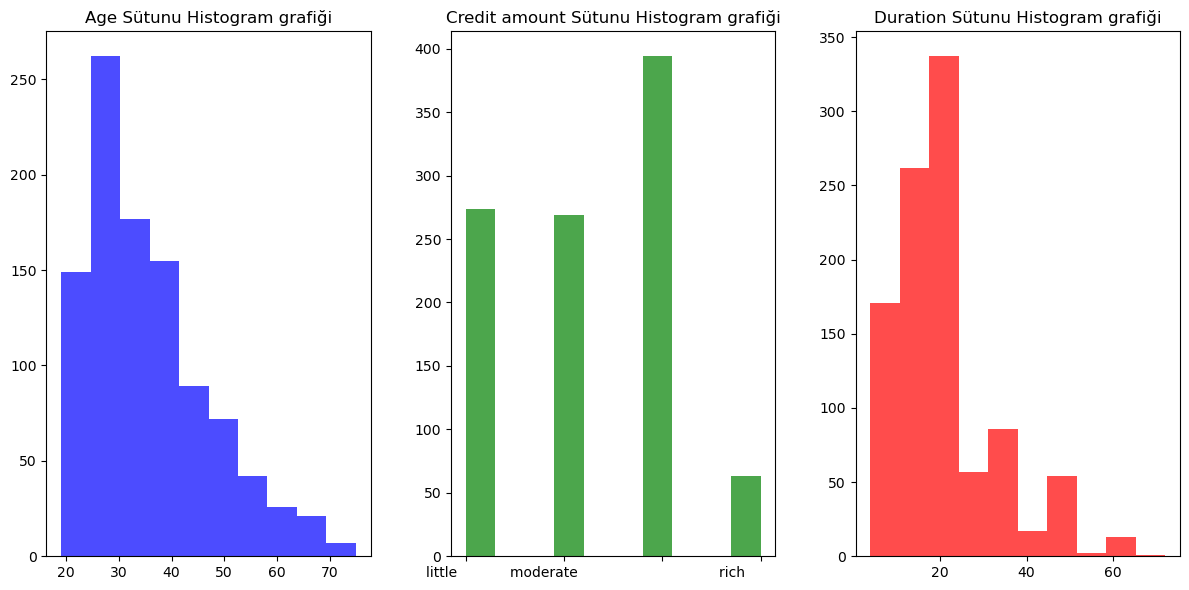

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.hist(df['Age '],bins=10,color='blue',alpha=0.7)
plt.title('Age Sütunu Histogram grafiği')

plt.subplot(1,3,2)
plt.hist(df['Checking account '],bins=10,color='green',alpha=0.7)
plt.title('Credit amount Sütunu Histogram grafiği')

plt.subplot(1,3,3)
plt.hist(df['Duration '],bins=10,color='red',alpha=0.7)
plt.title('Duration Sütunu Histogram grafiği')

plt.tight_layout()
plt.show()

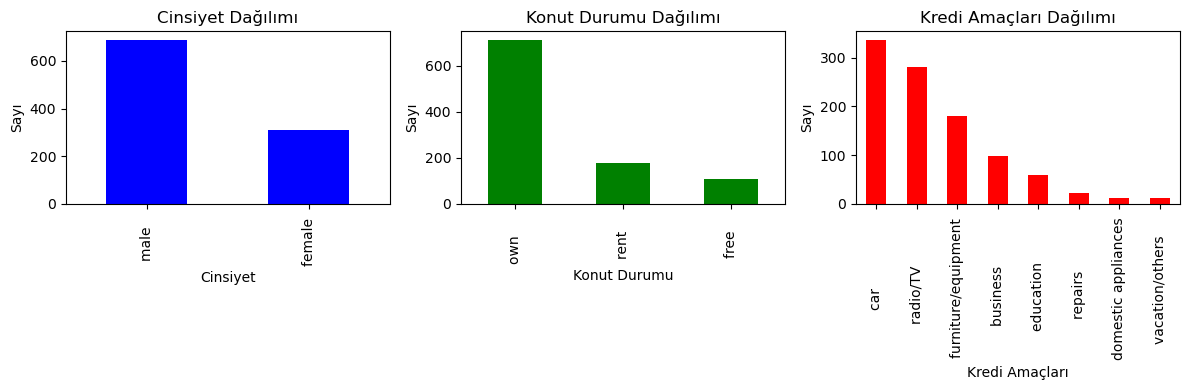

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
df['Sex    '].value_counts().plot(kind='bar',color='blue')
plt.title('Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Sayı')


plt.subplot(1,3,2)
df['Housing '].value_counts().plot(kind='bar',color='green')
plt.title('Konut Durumu Dağılımı')
plt.xlabel('Konut Durumu')
plt.ylabel('Sayı')


plt.subplot(1,3,3)
df['Purpose             '].value_counts().plot(kind='bar',color='red')
plt.title('Kredi Amaçları Dağılımı')
plt.xlabel('Kredi Amaçları')
plt.ylabel('Sayı')

plt.tight_layout()
plt.show()


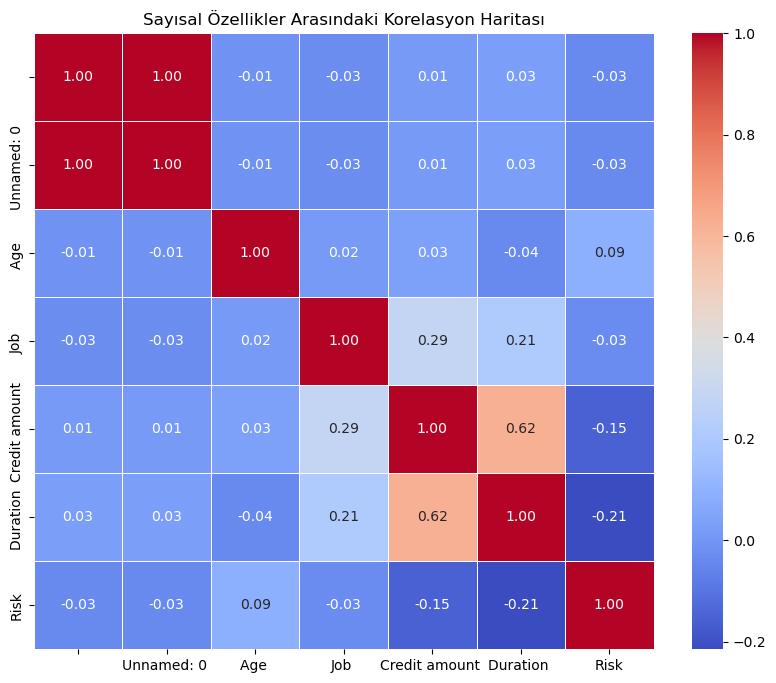

In [9]:
import seaborn as sns

numeric_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

plt.title('Sayısal Özellikler Arasındaki Korelasyon Haritası')
plt.show()


In [10]:
# Soru 1) Veri setinde eksik değerler var mı? Hangi kolonlarda var ve bunlarla nasıl başa çıkılacak?
import pandas as pd
import numpy as np

data = pd.read_csv("final_data.csv")
df = pd.DataFrame(data)

missing_values = df.isnull().sum()

missing_values

#CEVAP = VERİ SETİNDE EKSİK DEĞER BULUNMAMAKTADIR

                        0
Unnamed: 0              0
Age                     0
Sex                     0
Job                     0
Housing                 0
Saving accounts         0
Checking account        0
Credit amount           0
Duration                0
Purpose                 0
Risk                    0
dtype: int64

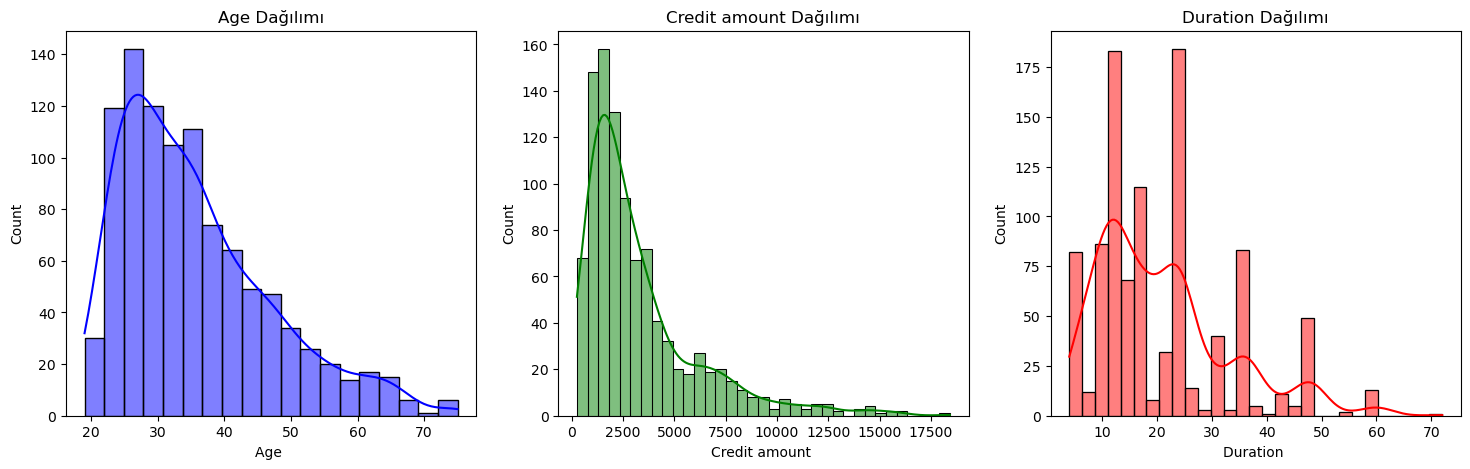

Yaş Aykırı Değerler:
            Unnamed: 0   Age   Sex      Job   Housing   Saving accounts   \
0       0            0    67  male        2  own                          
75     75           75    66  male        3  free      little             
137   137          137    66  male        1  own       quite rich         
163   163          163    70  male        3  free      little             
179   179          179    65  male        2  own       little             
186   186          186    74  female      3  free      little             
187   187          187    68  male        0  free      little             
213   213          213    66  male        3  own       little             
330   330          330    75  male        3  free      little             
430   430          430    74  male        1  own       little             
438   438          438    65  male        0  own       little             
536   536          536    75  female      3  own                          
554

In [11]:
#Soru 2) "Age", "Credit amount" ve "Duration" değişkenlerinin dağılımları nedir? Aykırı değerler var mı?

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age '], kde=True, ax=axes[0], color='blue').set(title='Age Dağılımı')
sns.histplot(df['Credit amount '], kde=True, ax=axes[1], color='green').set(title='Credit amount Dağılımı')
sns.histplot(df['Duration '], kde=True, ax=axes[2], color='red').set(title='Duration Dağılımı')

plt.show()

# Aykırı değerleri tespit etmek için IQR (Interquartile Range) metodu(ChatGPT yardımı ile)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

age_outliers = detect_outliers(df, 'Age ')
credit_amount_outliers = detect_outliers(df, 'Credit amount ')
duration_outliers = detect_outliers(df, 'Duration ')

print("Yaş Aykırı Değerler:\n", age_outliers)
print("Kredi Miktarı Aykırı Değerler:\n", credit_amount_outliers)
print("Süre Aykırı Değerler:\n", duration_outliers)


In [12]:
#Soru 3) Hedef kolonunda ("iyi" ve "kötü" kredi riski) oran nasıldır? Veri dengesiz mi?
# Hedef kolonundaki oranları bulalım
target_counts = df['Risk'].value_counts(normalize=True)
print("Risk Oranları:\n", target_counts)

# Veri dengesizliği kontrolünü yapalım
if target_counts[1] / target_counts[0] > 2 or target_counts[0] / target_counts[1] > 2:
    print("Veri dengesizliği var!")
else:
    print("Veri dengeli.")

Risk Oranları:
 Risk
1    0.7
0    0.3
Name: proportion, dtype: float64
Veri dengesizliği var!


In [13]:
#Soru 4) "İyi" kredi riski kategorisindeki bireylerin ortalama "Credit amount" değeri nedir?

# "İyi" kredi riski kategorisindeki bireylerin ortalama "Credit amount" değerini bulalım

good_credit_mean = df[df['Risk'] == 1]['Credit amount '].mean()
print("İyi Kredi Riski Olan Bireylerin Ortalama Kredi Miktarı:", good_credit_mean)


İyi Kredi Riski Olan Bireylerin Ortalama Kredi Miktarı: 2985.457142857143


C:\Users\aesez\AppData\Local\Temp\ipykernel_19536\3288239626.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Saving accounts ', data=free_housing, palette='Set2')


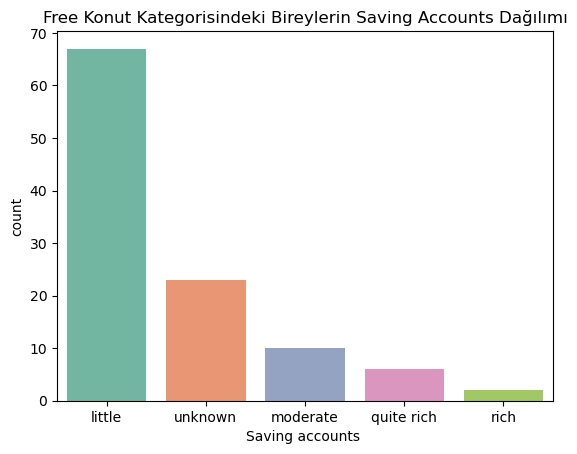

In [14]:
#Soru 5) "Free" (bedava) konut kategorisindeki bireylerin "Saving accounts" değişkeninin dağılımı nasıldır?

# Önce "Free" konut kategorisindeki bireylerin "Saving accounts" değişkeninin dağılımını bulalım
df['Saving accounts '] = df['Saving accounts '].str.strip()
df['Saving accounts '] = df['Saving accounts '].replace("", "unknown").fillna("unknown") #Saving accounts sütunundaki boş verileri dolduralım
free_housing = df[df['Housing '] == 'free    ']
sns.countplot(x='Saving accounts ', data=free_housing, palette='Set2')
plt.title('Free Konut Kategorisindeki Bireylerin Saving Accounts Dağılımı')
plt.show()

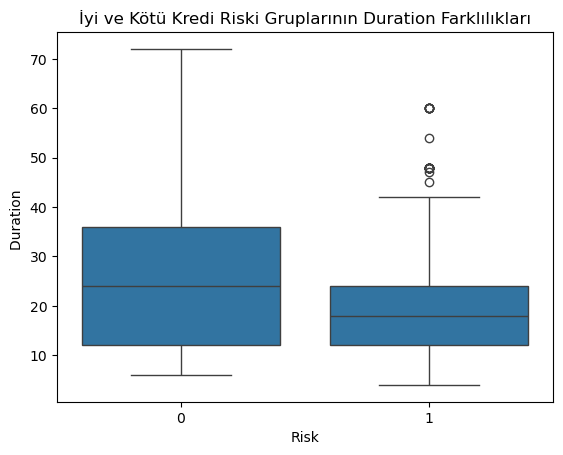

T-istatistiği: -6.9522507242467215, p-değeri: 6.4880498771843485e-12


In [15]:
#Soru 6) "İyi" ve "kötü" kredi riski grupları arasında "Duration" farklılık gösteriyor mu?

# "İyi" ve "kötü" kredi riski grupları arasında Duration farklılıklarını karşılaştıralım
sns.boxplot(x='Risk', y='Duration ', data=df)
plt.title('İyi ve Kötü Kredi Riski Gruplarının Duration Farklılıkları')
plt.show()

# İstatistiksel farkı kontrol etmek için t-testi yapalım
from scipy import stats
good_credit_duration = df[df['Risk'] == 1]['Duration ']
bad_credit_duration = df[df['Risk'] == 0]['Duration ']
t_stat, p_value = stats.ttest_ind(good_credit_duration, bad_credit_duration)

print(f"T-istatistiği: {t_stat}, p-değeri: {p_value}")

#CEVAP = EVET,GÖSTERİYOR.

In [16]:
#Soru 7) Yüksek kredi miktarına sahip bireylerin (75. percentile üzerinde) en sık kullandığı 3 "Purpose" kategorisi nedir?

# Kredi miktarının 75. yüzdelik dilimini bulalım
credit_75th = df['Credit amount '].quantile(0.75)

# Yüksek kredi miktarına sahip bireyleri seçelim
high_credit_df = df[df['Credit amount '] > credit_75th]

# En sık kullanılan "Purpose" kategorilerini bulalım
top_3_purposes = high_credit_df['Purpose             '].value_counts().head(3)
print("Yüksek Kredi Miktarına Sahip Bireylerin En Sık Kullandığı 3 Purpose Kategorisi:\n", top_3_purposes)

Yüksek Kredi Miktarına Sahip Bireylerin En Sık Kullandığı 3 Purpose Kategorisi:
 Purpose             
car                     108
radio/TV                 39
business                 39
Name: count, dtype: int64


VERİ TEMİZLEME ve ÖNİŞLEME

In [17]:
df_copy = df.copy()

In [18]:
df_copy.columns

Index(['    ', 'Unnamed: 0 ', 'Age ', 'Sex    ', 'Job ', 'Housing ',
       'Saving accounts ', 'Checking account ', 'Credit amount ', 'Duration ',
       'Purpose             ', 'Risk'],
      dtype='object')

In [19]:
df_copy['Saving accounts '] = df_copy['Saving accounts '].str.strip()
df_copy['Checking account '] = df_copy['Checking account '].str.strip()


In [20]:
import numpy as np

df_copy['Saving accounts '] = df_copy['Saving accounts '].replace("", "unknown").fillna("unknown")
df_copy['Checking account '] = df_copy['Checking account '].replace("", "unknown").fillna("unknown")

In [21]:
print(df_copy['Saving accounts '].unique())
print(df_copy['Checking account '].unique())

['unknown' 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' 'unknown' 'rich']


In [22]:
saving_accounts_mapping = {
    'unknown': 0,
    'little': 1,
    'moderate': 2,
    'rich': 3,
    'quite rich': 4
}

checking_account_mapping = {
    'unknown': 0,
    'little': 1,
    'moderate': 2,
    'rich': 3
}


df_copy['Saving accounts '] = df_copy['Saving accounts '].map(saving_accounts_mapping)
df_copy['Checking account '] = df_copy['Checking account '].map(checking_account_mapping)

In [23]:
df_copy

,,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,0,67,male,2,own,0,1,1169,6,radio/TV,1
1,1,1,22,female,2,own,1,2,5951,48,radio/TV,0
2,2,2,49,male,1,own,1,0,2096,12,education,1
3,3,3,45,male,2,free,1,1,7882,42,furniture/equipment,1
4,4,4,53,male,2,free,1,1,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,31,female,1,own,1,0,1736,12,furniture/equipment,1
996,996,996,40,male,3,own,1,1,3857,30,car,1
997,997,997,38,male,2,own,1,0,804,12,radio/TV,1
998,998,998,23,male,2,free,1,1,1845,45,radio/TV,0


In [24]:
numeric_columns = df_copy.select_dtypes(include=['number']).columns
numeric_columns

df_copy[numeric_columns] = df_copy[numeric_columns].apply(lambda col: col.fillna(col.median()))

In [25]:
df_copy

,,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,0,67,male,2,own,0,1,1169,6,radio/TV,1
1,1,1,22,female,2,own,1,2,5951,48,radio/TV,0
2,2,2,49,male,1,own,1,0,2096,12,education,1
3,3,3,45,male,2,free,1,1,7882,42,furniture/equipment,1
4,4,4,53,male,2,free,1,1,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,31,female,1,own,1,0,1736,12,furniture/equipment,1
996,996,996,40,male,3,own,1,1,3857,30,car,1
997,997,997,38,male,2,own,1,0,804,12,radio/TV,1
998,998,998,23,male,2,free,1,1,1845,45,radio/TV,0


In [26]:
print(df_copy[numeric_columns].isnull().sum())

                     0
Unnamed: 0           0
Age                  0
Job                  0
Saving accounts      0
Checking account     0
Credit amount        0
Duration             0
Risk                 0
dtype: int64


In [27]:
df_copy.columns

Index(['    ', 'Unnamed: 0 ', 'Age ', 'Sex    ', 'Job ', 'Housing ',
       'Saving accounts ', 'Checking account ', 'Credit amount ', 'Duration ',
       'Purpose             ', 'Risk'],
      dtype='object')

In [28]:
yeni_df_copy = df_copy.drop(columns=['    ', 'Unnamed: 0 '])

In [29]:
yeni_df_copy['Sex    '].unique()

array(['male   ', 'female '], dtype=object)

In [30]:
cinsiyet_mapping = {
    'male   ':1,
    'female ':0
}

yeni_df_copy['Sex    '] = yeni_df_copy['Sex    '].map(cinsiyet_mapping)



In [31]:
yeni_df_copy

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,own,0,1,1169,6,radio/TV,1
1,22,0,2,own,1,2,5951,48,radio/TV,0
2,49,1,1,own,1,0,2096,12,education,1
3,45,1,2,free,1,1,7882,42,furniture/equipment,1
4,53,1,2,free,1,1,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,own,1,0,1736,12,furniture/equipment,1
996,40,1,3,own,1,1,3857,30,car,1
997,38,1,2,own,1,0,804,12,radio/TV,1
998,23,1,2,free,1,1,1845,45,radio/TV,0


In [32]:
yeni_df_copy['Housing '].unique()

array(['own     ', 'free    ', 'rent    '], dtype=object)

In [33]:
housing_mapping = {
    'own     ':0,
    'free    ':1,
    'rent    ':2
}

yeni_df_copy['Housing '] = yeni_df_copy['Housing '].map(housing_mapping)

yeni_df_copy

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,0,0,1,1169,6,radio/TV,1
1,22,0,2,0,1,2,5951,48,radio/TV,0
2,49,1,1,0,1,0,2096,12,education,1
3,45,1,2,1,1,1,7882,42,furniture/equipment,1
4,53,1,2,1,1,1,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,0,1,0,1736,12,furniture/equipment,1
996,40,1,3,0,1,1,3857,30,car,1
997,38,1,2,0,1,0,804,12,radio/TV,1
998,23,1,2,1,1,1,1845,45,radio/TV,0


In [34]:
yeni_df_copy['Purpose             '].unique()

array(['radio/TV            ', 'education           ',
       'furniture/equipment ', 'car                 ',
       'business            ', 'domestic appliances ',
       'repairs             ', 'vacation/others     '], dtype=object)

In [35]:
amac_mapping = {
    'radio/TV            ':0,
    'education           ':1,
    'furniture/equipment ':2,
    'car                 ':3,
    'business            ':4,
    'domestic appliances ':5,
    'repairs             ':6,
    'vacation/others     ':7
}

yeni_df_copy['Purpose             '] = yeni_df_copy['Purpose             '].map(amac_mapping)
yeni_df_copy

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,0,0,1,1169,6,0,1
1,22,0,2,0,1,2,5951,48,0,0
2,49,1,1,0,1,0,2096,12,1,1
3,45,1,2,1,1,1,7882,42,2,1
4,53,1,2,1,1,1,4870,24,3,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,0,1,0,1736,12,2,1
996,40,1,3,0,1,1,3857,30,3,1
997,38,1,2,0,1,0,804,12,0,1
998,23,1,2,1,1,1,1845,45,0,0


In [36]:
yeni_df_copy.isnull().sum()

Age                     0
Sex                     0
Job                     0
Housing                 0
Saving accounts         0
Checking account        0
Credit amount           0
Duration                0
Purpose                 0
Risk                    0
dtype: int64

In [37]:
yeni_df_copy.columns

Index(['Age ', 'Sex    ', 'Job ', 'Housing ', 'Saving accounts ',
       'Checking account ', 'Credit amount ', 'Duration ',
       'Purpose             ', 'Risk'],
      dtype='object')

In [38]:
df_copy = pd.get_dummies(df_copy, columns=['Housing '], drop_first=False)

In [39]:
df_copy = pd.get_dummies(df_copy, columns=['Purpose             '], drop_first=False)

In [40]:
numerical_columns = df_copy.select_dtypes(include=['number']).columns
print(numerical_columns)

Index(['    ', 'Unnamed: 0 ', 'Age ', 'Job ', 'Saving accounts ',
       'Checking account ', 'Credit amount ', 'Duration ', 'Risk'],
      dtype='object')


In [41]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df_copy.select_dtypes(include=['number']).columns

scaler = StandardScaler()

df_copy[numerical_columns] = scaler.fit_transform(df_copy[numerical_columns])

print(df_copy[numerical_columns].head())


             Unnamed: 0       Age       Job   Saving accounts   \
0 -1.730320    -1.730320  2.766456  0.146949         -1.203212   
1 -1.726856    -1.726856 -1.191404  0.146949         -0.204696   
2 -1.723391    -1.723391  1.183312 -1.383771         -0.204696   
3 -1.719927    -1.719927  0.831502  0.146949         -0.204696   
4 -1.716463    -1.716463  1.535122  0.146949         -0.204696   

   Checking account   Credit amount   Duration       Risk  
0          -0.001045       -0.745131  -1.236478  0.654654  
1           1.044372        0.949817   2.248194 -1.527525  
2          -1.046463       -0.416562  -0.738668  0.654654  
3          -0.001045        1.634247   1.750384  0.654654  
4          -0.001045        0.566664   0.256953 -1.527525  


ÖZELLİK MÜHENDİSLİĞİ

In [42]:
df_copy['Credit per Month'] = df_copy['Credit amount '] / df_copy['Duration ']

print(df_copy[['Credit amount ', 'Duration ', 'Credit per Month']].head())


   Credit amount   Duration   Credit per Month
0       -0.745131  -1.236478          0.602624
1        0.949817   2.248194          0.422480
2       -0.416562  -0.738668          0.563938
3        1.634247   1.750384          0.933651
4        0.566664   0.256953          2.205319


In [43]:
df_copy_cleaned = df_copy.select_dtypes(include=[float, int])

correlation_matrix = df_copy_cleaned.corr()

print(correlation_matrix)

high_corr = correlation_matrix[correlation_matrix > 0.9].stack().index.tolist()
print("Yüksek korelasyona sahip özellikler:", high_corr)

for col1, col2 in high_corr:
    if col1 != col2: 
        df_copy_cleaned.drop(columns=[col2], inplace=True)

print(df_copy_cleaned.head())

                             Unnamed: 0       Age       Job   \
                   1.000000     1.000000 -0.010096 -0.027345   
Unnamed: 0         1.000000     1.000000 -0.010096 -0.027345   
Age               -0.010096    -0.010096  1.000000  0.015673   
Job               -0.027345    -0.027345  0.015673  1.000000   
Saving accounts   -0.035594    -0.035594 -0.016680 -0.044814   
Checking account  -0.048268    -0.048268 -0.049058 -0.054255   
Credit amount      0.013488     0.013488  0.032716  0.285385   
Duration           0.030788     0.030788 -0.036136  0.210910   
Risk              -0.034606    -0.034606  0.091127 -0.032735   
Credit per Month   0.029417     0.029417 -0.050871  0.038047   

                   Saving accounts   Checking account   Credit amount   \
                          -0.035594          -0.048268        0.013488   
Unnamed: 0                -0.035594          -0.048268        0.013488   
Age                       -0.016680          -0.049058        0.032716   

MODEL UYGULAMASI ve KARŞILAŞTIRMA

Lojistik Regresyon Modeli Doğruluğu: 0.7200
KNN Classifier Modeli Ortalama Kare Hata (MSE): 0.3700


c:\Users\aesez\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


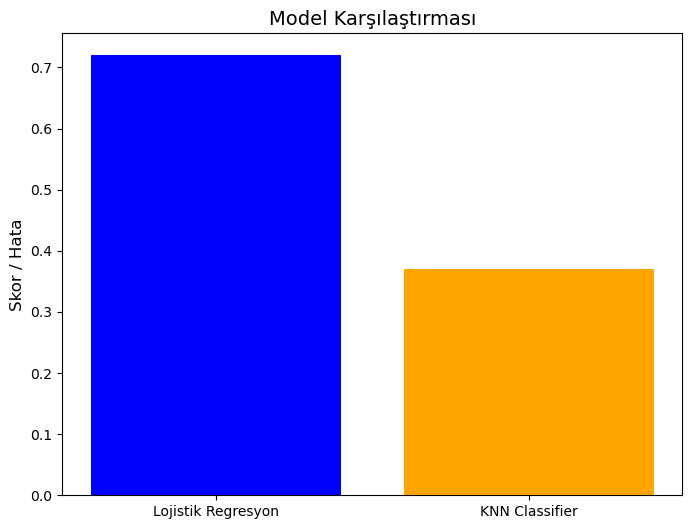

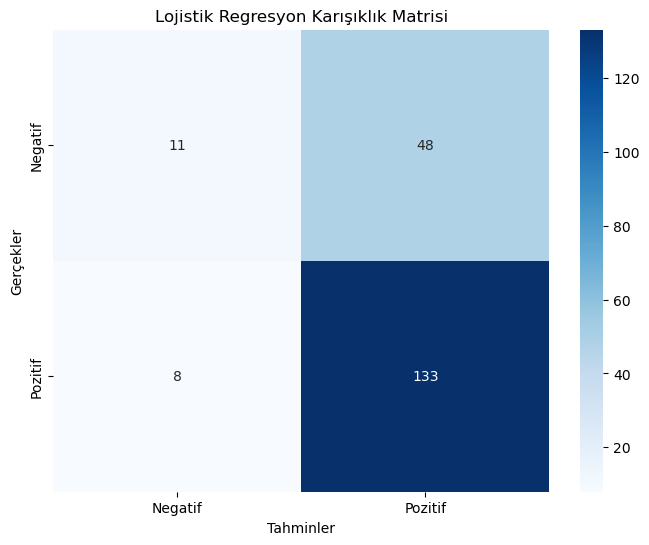

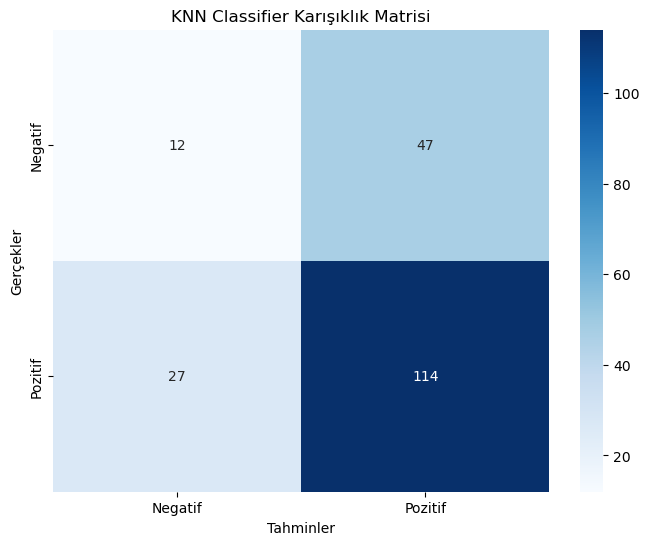

Lojistik Regresyon Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.58      0.19      0.28        59
           1       0.73      0.94      0.83       141

    accuracy                           0.72       200
   macro avg       0.66      0.56      0.55       200
weighted avg       0.69      0.72      0.67       200

KNN Classifir Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.31      0.20      0.24        59
           1       0.71      0.81      0.75       141

    accuracy                           0.63       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.59      0.63      0.60       200



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

X = yeni_df_copy.drop(columns=['Risk'])  
y = yeni_df_copy['Risk'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

log_accuracy = accuracy_score(y_test, log_y_pred)

knn_mse = mean_squared_error(y_test, knn_y_pred)

print(f"Lojistik Regresyon Modeli Doğruluğu: {log_accuracy:.4f}")
print(f"KNN Classifier Modeli Ortalama Kare Hata (MSE): {knn_mse:.4f}")

labels = ['Lojistik Regresyon', 'KNN Classifier']
scores = [log_accuracy, knn_mse]

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'orange'])

plt.title('Model Karşılaştırması', fontsize=14)
plt.ylabel('Skor / Hata', fontsize=12)
plt.show()

log_cm = confusion_matrix(y_test, log_y_pred)
log_cr = classification_report(y_test, log_y_pred)

knn_cm = confusion_matrix(y_test, knn_y_pred.round()) 
knn_cr = classification_report(y_test, knn_y_pred.round())

plt.figure(figsize=(8,6))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.title('Lojistik Regresyon Karışıklık Matrisi')
plt.xlabel('Tahminler')
plt.ylabel('Gerçekler')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.title('KNN Classifier Karışıklık Matrisi')
plt.xlabel('Tahminler')
plt.ylabel('Gerçekler')
plt.show()

print("Lojistik Regresyon Sınıflandırma Raporu:\n", log_cr)
print("KNN Classifir Sınıflandırma Raporu:\n", knn_cr)

